In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt
import numpy as np
import PIL
from skimage import transform

import glob
import os

In [2]:
# load model:
model = keras.models.load_model('tfunetmod.h5')

2022-02-07 11:40:11.387601: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
test_path = r'/Users/kaylaneal/venv/seg-bb/image'
mask_path = r'/Users/kaylaneal/venv/seg-bb/mask'

In [4]:
images = []
masks = []

In [5]:
i = 0
for path, folders, files in os.walk(test_path):
    for file in files:
        if (i < 3):
            images.append(os.path.abspath(os.path.join(test_path, file)))
            masks.append(os.path.abspath(os.path.join(mask_path, file)))
            i += 1
        else:
            break
            
'''to make sure each picture correlates to the correct mask: have them names identically'''

'to make sure each picture correlates to the correct mask: have them names identically'

In [6]:
def load(filename):
    test = PIL.Image.open(filename)
    test = img_to_array(test)
    test = np.array(test).astype('float32')/255
    test = transform.resize(test, (128, 128, 3))
    test = np.expand_dims(test, axis=0)
    
    return test

In [7]:
# load and normalize images/masks:
for im in images:
    im = load_img(im, target_size = (128, 128))
    im = img_to_array(im)
    im = im.reshape((1,) + im.shape)
    im = np.array(im).astype('float32')/255
    im = transform.resize(im, (128, 128, 3))
    im = np.expand_dims(im, axis=0)

In [8]:
def display(display_list):
    plt.figure(figsize=(12,12))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        try:
            plt.imshow(display_list[i])
        except:
            img = plt.imread(display_list[i])
            plt.imshow(img)
        plt.axis('off')
        
    plt.show()
    
# function to display images & corresponding mask

In [12]:
def create_mask(pred_mask):
    # pred_mask = np.squeeze(pred_mask) # cause of predicted mask being a weird outcome
    pred_mask = tf.argmax(pred_mask, axis = -1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [13]:
# make predictions:
predictions = []
for im in images:
    pred = load_img(im, target_size = (128,128))
    pred = img_to_array(pred)
    pred = pred.reshape((1,) + pred.shape)
    pred = np.array(pred).astype('float32')/255
    
    pred = model.predict(pred)
    pred = create_mask(pred)
    predictions.append(pred)

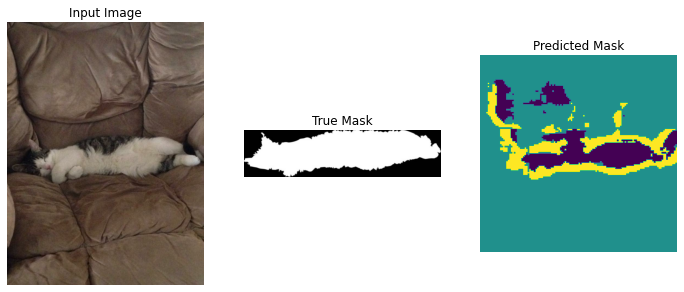

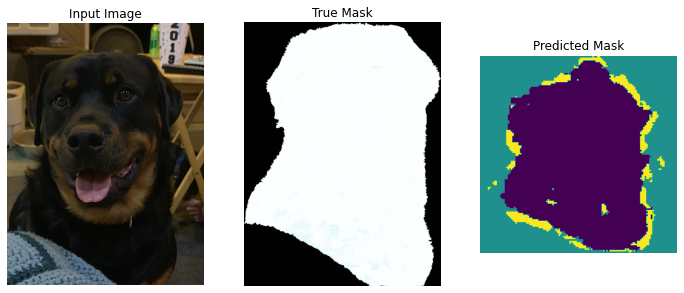

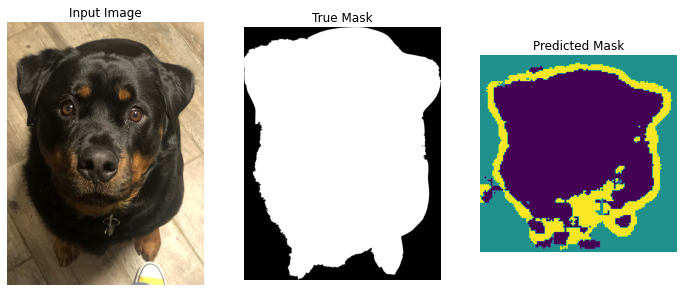

In [14]:
for i in range(len(images)):
    sample_image = images[i]
    sample_mask = masks[i]
    pred_mask = predictions[i]

    display([sample_image, sample_mask, pred_mask])